 This script is used to produce Suplementary Figures of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM


## Supplementary Figure 1

### Fluorescense - Plasmid copy number correlation

## System preparation


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr



### Mounting Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### File paths

In [3]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"

rootDir=rootDir+"pBGT/GIT/"

workingDir=rootDir+"code/Supplementary/"
raw_data_path=rootDir+"data/supplementary/sFig-1/"

sfig_path=rootDir+"figures/SuppFigures/"


In [4]:
file_ampli=raw_data_path+"Sorter_MCP-amp_pBGT-LB3 -  Quantification Amplification Results_SYBR.csv"
df_ampli=pd.read_csv(file_ampli)
df_ampli.head()

,Unnamed: 0,Cycle,A1,A2,A3,A4,A5,A6,A7,A8,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,NaN,1,-10.045147,-6.440372,-12.014094,-10.713545,-5.010588,1.774746,-2.550072,-2.336550,...,-1.212438,35.184462,33.409437,45.621774,33.058057,47.667020,33.960550,4.196935,14.467367,15.559111
1,NaN,2,-10.625579,-4.330629,-2.863186,-5.830249,-7.411290,2.632171,-2.247211,1.653204,...,4.894621,47.274767,45.026410,57.828880,51.811719,62.556039,40.701125,12.724247,19.052493,18.331409
2,NaN,3,-3.936811,1.684063,-0.598000,1.393978,3.319348,0.521784,3.512071,5.369023,...,0.371532,64.898282,64.463729,74.559392,62.456302,75.107337,54.014719,12.382848,15.424639,14.664781
3,NaN,4,5.696525,-1.883101,1.470637,3.071687,1.420655,-0.510756,-1.059875,-2.915340,...,3.404582,86.531042,85.951639,99.412522,83.275069,100.143116,72.019625,12.856174,18.474066,22.181904
4,NaN,5,-4.132530,4.565942,-1.401225,-0.191056,-1.188313,2.715259,-1.121868,2.128850,...,9.500746,121.595989,120.859790,132.347873,112.176307,134.801568,95.953734,20.124622,22.982543,29.726885


In [5]:

cols=[x for x in np.arange(1,13)]
rows="A B C D E F G H"
rows=rows.split()
fig,axs=plt.subplots(len(rows),len(cols),sharex=True,sharey=True,figsize=(110,80))
time=df_ampli["Cycle"]
exclude_wells=[]
for ri,row in enumerate(rows):
    for ci,col in enumerate(cols):
        well=row+str(col)
        vals=list(df_ampli[well])
        color='b'
        if(vals[-1]<1000):
            color='r'
            exclude_wells.append(well)
        axs[ri,ci].plot(time,vals,c=color,label=well)
        axs[ri,ci].legend(fontsize="xx-large")

for ax, col in zip(axs[0], cols):
    ax.set_title(col,size=80)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=0, size=80)

plt.show()

In [6]:
file=raw_data_path+"Sorter_MCP-amp_pBGT-LB3 -  Quantification Cq Results.csv"
df_all=pd.read_csv(file)
df_all.head()

,Unnamed: 0,Well,Fluor,Target,Content,Sample,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,Set Point,Well Note
0,NaN,A01,SYBR,dxs,Std,pBGT-sorter,R1,23.207039,23.207039,0,1000000,6,1000000,0,60,NaN
1,NaN,A02,SYBR,dxs,Std,pBGT-sorter,R1,22.897251,22.897251,0,1000000,6,1000000,0,60,NaN
2,NaN,A03,SYBR,dxs,Std,pBGT-sorter,R1,23.055818,23.055818,0,1000000,6,1000000,0,60,NaN
3,NaN,A04,SYBR,dxs,Std,MGGT,rep-1,15.760034,15.760034,0,1000000,6,1000000,0,60,NaN
4,NaN,A05,SYBR,dxs,Std,MGGT,rep-1,15.976670,15.976670,0,1000000,6,1000000,0,60,NaN


In [7]:
ex_wells=[]
print(exclude_wells)
for x in exclude_wells:
    st=[y for y in x]
    #print(st)
    if(len(x)<3):
        st=st[0]+"0"+st[1]
    else:
        st=st[0]+st[1]+st[2]
    ex_wells.append(st)
ex_wells

[]


[]

In [8]:
df_sorted=df_all[df_all['Sample']=="pBGT-sorter"]
df_sorted.head()

,Unnamed: 0,Well,Fluor,Target,Content,Sample,Biological Set Name,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,Set Point,Well Note
0,NaN,A01,SYBR,dxs,Std,pBGT-sorter,R1,23.207039,23.207039,0,1000000,6,1000000,0,60,NaN
1,NaN,A02,SYBR,dxs,Std,pBGT-sorter,R1,22.897251,22.897251,0,1000000,6,1000000,0,60,NaN
2,NaN,A03,SYBR,dxs,Std,pBGT-sorter,R1,23.055818,23.055818,0,1000000,6,1000000,0,60,NaN
12,NaN,B01,SYBR,dxs,Std,pBGT-sorter,R2,28.751873,28.751873,0,1000000,6,1000000,0,60,NaN
13,NaN,B02,SYBR,dxs,Std,pBGT-sorter,R2,28.725315,28.725315,0,1000000,6,1000000,0,60,NaN


In [9]:
df_all.Sample.unique()

array(['pBGT-sorter', 'MGGT', 'pBGT-3-LB', 'pBGT-amp25', 'G54U-amp50',
       'G55U-amp50'], dtype=object)

In [10]:
eff_dxs=1
eff_tem=1


### reported eff Alvaros

eff_dxs=.9552
eff_tem=.9429


#using all dilutions
#eff_dxs=1.1673
#eff_tem=1.0647

# #using 8-fold and discarting more diluted reaction

#eff_dxs=1.0439
#eff_tem=.99

#eff_dxs=1.0673
#eff_tem=.9865

region R1
['A01', 'A02', 'A03']
['E01', 'E02', 'E03']
[22.438445490122447, 22.49441918083238, 23.62441726041295]
region R3
['C01', 'C02', 'C03']
['G01', 'G02', 'G03']
[28.13450169271881, 25.989863715641224, 30.49534234216547]
region R4
['D01', 'D02', 'D03']
['H01', 'H02', 'H03']
[40.288371181420025, 43.62673254875585, 54.06416960400646]
lr0 LinregressResult(slope=0.00048757883457512734, intercept=24.223569349698657, rvalue=0.9338591056126472, pvalue=0.00022957237205742522, stderr=7.05767919505879e-05, intercept_stderr=1.8449228914963764)
Saving fig as: 
 /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/figures/SuppFigures/sFig-1.pdf


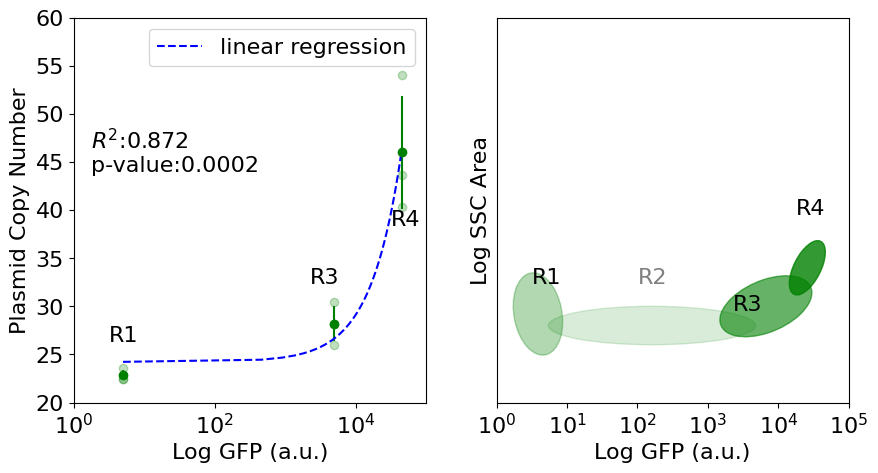

In [12]:

fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})

#clrs=["tomato", "olive","lime","chocolate"]

col_mean=[]
all_means=[]
all_cns=[]
all_xs=[]
sub_regions=['R1', 'R3', 'R4']
gfps=[5,5000,45000]

#sub_regions=['R1', 'R2','R3', 'R4']
#gfps=[5,500,7500,50000]

for ri,r in enumerate(sub_regions):

    x=gfps[ri]
    tech_mean_d=[]
    tech_mean_t=[]
    tech_mean_cn=[]
    tech_x=[]
    print("region",r)
    df_region=df_sorted[df_sorted["Biological Set Name"]==r]
    r_dxs_cqs=list(df_region[df_region["Target"]=="dxs"]["Cq"])
    r_tem_cqs=list(df_region[df_region["Target"]=="tem"]["Cq"])
    #print(r_dxs_cqs,r_tem_cqs)
    wells_dxs=list(df_region[df_region["Target"]=="dxs"]["Well"])
    wells_tem=list(df_region[df_region["Target"]=="tem"]["Well"])
    print(wells_dxs)
    print(wells_tem)
    wi=0
    for ct_d,ct_t in zip(r_dxs_cqs,r_tem_cqs):
        wd=wells_dxs[wi]
        wt=wells_tem[wi]
        wi+=1
#         if(wd=="D03"):
#             continue

        cn_eff=((1+eff_dxs)**ct_d)/((1+eff_tem)**ct_t)
#             #normv=col_mean[0]
#             cn_eff=cn_eff/normv

#             if(np.isnan(cn_eff)):
#                 print("xxx",well_d, well_t)
#                 continue
#             if(well_d in ex_wells or well_t in ex_wells):
#                 print("xxxxx",well_d, well_t)
#                 continue
        tech_mean_d.append(ct_d)
        tech_mean_t.append(ct_t)
        tech_mean_cn.append(cn_eff)
        #tech_x.append(x)
        all_xs.append(x)
        all_cns.append(cn_eff)
        #ax[1].scatter(r,cn_eff,c=clrs[rbi],alpha=.5)
        ax[0].scatter(x,cn_eff,c='g',alpha=.25)
    print(tech_mean_cn)
    mean_d=np.mean(tech_mean_d)
    mean_t=np.mean(tech_mean_t)
    mean_cn=np.mean(tech_mean_cn)
    std_cn=np.std(tech_mean_cn)
    #all_cns.append(tech_mean_cn)
    #all_xs.append(tech_x)
    #ax[1].scatter(rmean_cn,c=clrs[rbi],marker=(5, 2))
    #ax[0].scatter(x,mean_cn,c='g',alpha=1)
    ax[0].errorbar(x,mean_cn,yerr=std_cn,c='g',alpha=1,fmt='-o')
    all_means.append(mean_cn)




lr0=linregress(all_xs,all_cns)
gfpsx=np.linspace(gfps[0],gfps[-1],100)


ylr0=[x*lr0.slope+lr0.intercept for x in gfpsx]

print("lr0",lr0)
#print("ylr",ylr)
#ax[0].plot(gfps,all_means,'k',alpha=.5,label="mean PCN")
ax[0].plot(gfpsx,ylr0,'b',label="linear regression",ls='dashed')
#ax[0].plot(gfpsx,ylr0,'r',label="regression0")
#ax[0].text(.1,.8,"R^2",transform=ax[0].transAxes, ha="left", va="top")

ax[0].set_xlim(1,1e5)
ax[0].set_xscale("log")
#ax[0].set_yscale("log")

ax[0].set_ylim(20,60)

#ax[0].vlines(x=7000,ymin=0,ymax=40)
ax[0].annotate(r"$R^2$:""%s\np-value:%s"%(round(lr0.rvalue**2,3),round(lr0.pvalue,4)), xy=(0.05, 0.6), xycoords='axes fraction')
ax[0].set_ylabel("Plasmid Copy Number")
#ax[0].set_xlabel("Region")
ax[0].set_xlabel("Log GFP (a.u.)")
#ax[0].set_xticks(gfps2)
#ax[0].set_xticklabels(sub_regions2)
#ax[0].minorticks_off()
ax[0].legend()

sx=1.7
el1 = mpatches.Ellipse((.2, .23), 0.25, 0.2,color="green", angle=-30, alpha=0.3)
ax[1].add_artist(el1)
el2 = mpatches.Ellipse((.75, .2), 1, 0.1,color="green", angle=0, alpha=0.15)
ax[1].add_artist(el2)
el3 = mpatches.Ellipse((1.3, .25), 0.45, 0.14,color="green", angle=10, alpha=0.6)
ax[1].add_artist(el3)
el4 = mpatches.Ellipse((1.5, .35), 0.2, 0.1,color="green", angle=35, alpha=0.8)
ax[1].add_artist(el4)
ax[1].set_xlim(0,sx)
ax[1].set_yticks([])
#ax[1].xaxis.label.set_visible(False)
#ax[1].set_ylim(0,sx/2)
xtickst=[0,.25,.5,.75,1.,1.25]
xtickst=[x*sx/1.25 for x in xtickst ]
ax[1].set_xticks(xtickst)
ax[1].set_xticklabels(["$10^0$","$10^1$","$10^2$","$10^3$","$10^4$","$10^5$"])
ax[1].set_xlabel("Log GFP (a.u.)")
ax[1].set_ylabel("Log SSC Area")
#fig.suptitle("MG/pBGT FACS regions",y=1)

ax[1].text(.1, .35, "R1", transform=ax[1].transAxes, ha="left", va="top")
ax[1].text(.4, .35, "R2", transform=ax[1].transAxes, ha="left", va="top",alpha=.5)
ax[1].text(.67, .28, "R3", transform=ax[1].transAxes, ha="left", va="top")
ax[1].text(.85, .53, "R4", transform=ax[1].transAxes, ha="left", va="top")


ax[0].text(.1, .2, "R1", transform=ax[0].transAxes, ha="left", va="top")
ax[0].text(.67, .35, "R3", transform=ax[0].transAxes, ha="left", va="top")
ax[0].text(.9, .5, "R4", transform=ax[0].transAxes, ha="left", va="top")


plt.rcParams.update({'font.size': 16})
out_fig_name=sfig_path+"sFig-1.pdf"

print("Saving fig as: \n",out_fig_name)
#plt.tight_layout()
plt.savefig(out_fig_name,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()